**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [3]:
np.random.seed(12345)
#x=np.random.randint(0,220,15)
x=np.arange(0,100,9)
y=line(1.5,x,0, errors)
y

array([  0.        ,  12.67629239,  26.40966969,  41.05940333,
        50.36072925,  64.7022469 ,  80.87502431,  84.78364803,
        92.71936662, 136.21262584, 144.38255658, 153.05644689])

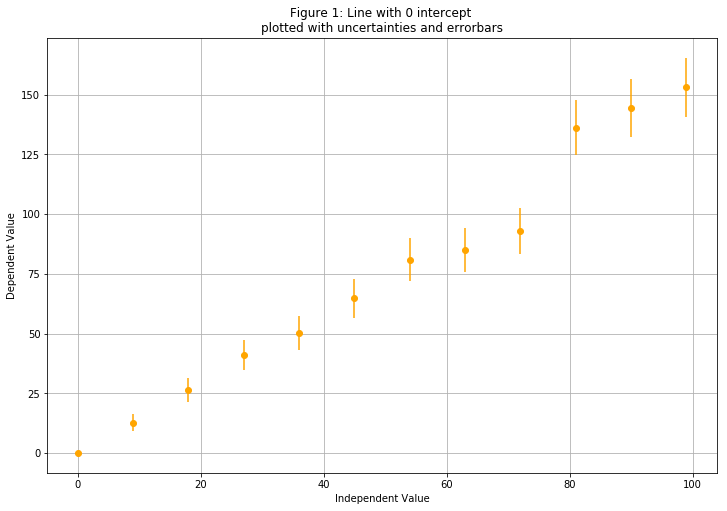

In [4]:
pl.figure(figsize=(12,8))
pl.errorbar(x, y, yerr=errors(y), fmt='o',color='orange')
pl.plot(x,y,'-', alpha=0.0)
pl.xlabel('Independent Value')
pl.ylabel('Dependent Value')
pl.title('Figure 1: Line with 0 intercept \nplotted with uncertainties and errorbars')

pl.grid()


### Caption:
Figure 1 shows the line of intercept=0 plotted in dots with errors as uncertainties.

# print y, x, and the result of applying statsmodels.api.add_constant() to x

In [5]:
print('x value:',x,'\ny value:',y)

x value: [ 0  9 18 27 36 45 54 63 72 81 90 99] 
y value: [  0.          12.67629239  26.40966969  41.05940333  50.36072925
  64.7022469   80.87502431  84.78364803  92.71936662 136.21262584
 144.38255658 153.05644689]


In [6]:
x_c=sm.add_constant(x)

# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [7]:
# The Wrong Way
smfit1 = smf.OLS(y, x).fit()
smfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1541.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           3.55e-13
Time:                        23:41:18   Log-Likelihood:                -41.155
No. Observations:                  12   AIC:                             84.31
Df Residuals:                      11   BIC:                             84.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5124      0.039     39.253      0.000         1.428     1.597
==============================================================================
Omnibus:                        1.011   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.040
Skew:                          -0.097   Prob(JB):                        0.980
Kurtosis:                       3.203   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


smfit2 = smf.OLS(y, x).fit()
smfit2.summary()

In [8]:
# The right way
smfit2 = smf.OLS(y, x_c).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     445.5
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.27e-09
Time:                        23:41:20   Log-Likelihood:                -40.818
No. Observations:                  12   AIC:                             85.64
Df Residuals:                      10   BIC:                             86.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.2816      4.320     -0.760      0.465       -12.906     6.343
x1             1.5600      0.074     21.106      0.000         1.395     1.725
==============================================================================
Omnibus:                        2.657   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                0.795
Skew:                          -0.592   Prob(JB):                        0.672
Kurtosis:                       3.434   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

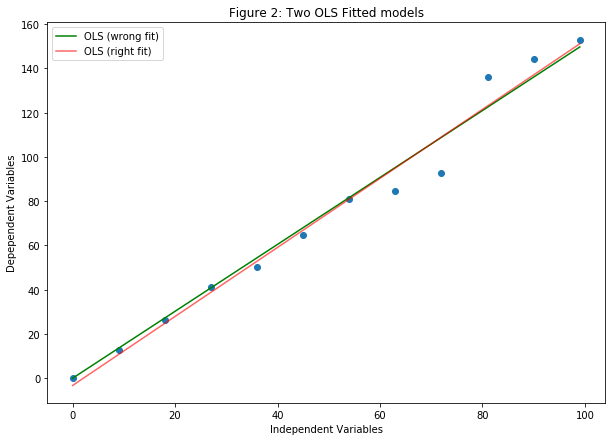

In [9]:

pl.figure(figsize=(10,7))
pl.plot(x,y,'o')
pl.plot(x,smfit1.fittedvalues,'-',color='green', label='OLS (wrong fit)')
pl.plot(x,smfit2.fittedvalues,'-', color='red', alpha=0.6, label ='OLS (right fit)')
pl.xlabel('Independent Variables')
pl.ylabel('Depependent Variables')
pl.title('Figure 2: Two OLS Fitted models')
pl.legend()

### Caption:
Figure 2 shows the two OLS model fitted lines are very similar to each other. 

# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [10]:
np.random.seed(12345)
x1=np.random.randint(0,350,20)
#y1=np.random.randint(300,700,10)
y1=line(2,x1,300, errors)

Text(0.5,1,'Figure 3: Line with intercept >=100*slope \nPlotted with uncertainties as Errorbars')

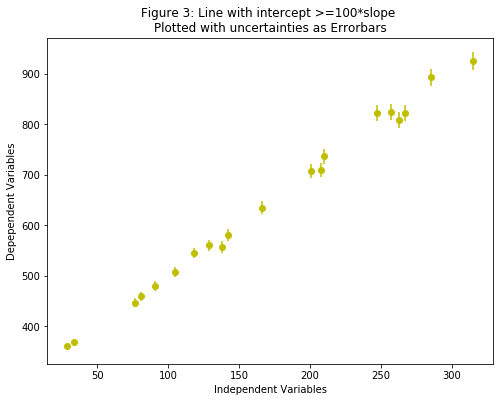

In [11]:
pl.figure(figsize=(8,6))
pl.errorbar(x1,y1, yerr=errors(x1),fmt='yo')
pl.plot(x1,y1,'-', alpha=0.0)
pl.xlabel('Independent Variables')
pl.ylabel('Depependent Variables')
pl.title('Figure 3: Line with intercept >=100*slope \nPlotted with uncertainties as Errorbars')

### Caption: 
Figure 3 shows the randomly generated dots which can fit in a line with slope = 2 and intercep = 300. 

# repeat step 3

In [12]:
smfit3 = smf.OLS(y1, x1).fit()
smfit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     447.5
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.15e-14
Time:                        23:41:30   Log-Likelihood:                -126.21
No. Observations:                  20   AIC:                             254.4
Df Residuals:                      19   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.4383      0.163     21.154      0.000         3.098     3.779
==============================================================================
Omnibus:                        1.620   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.941
Skew:                          -0.062   Prob(JB):                        0.625
Kurtosis:                       1.944   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# repeat step 4

In [13]:
smfit4 = smf.OLS(y1, sm.add_constant(x1)).fit()
smfit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3782.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.23e-22
Time:                        23:41:32   Log-Likelihood:                -77.666
No. Observations:                  20   AIC:                             159.3
Df Residuals:                      18   BIC:                             161.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        296.6686      6.196     47.880      0.000       283.651   309.686
x1             2.0269      0.033     61.498      0.000         1.958     2.096
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.110
Skew:                           0.143   Prob(JB):                        0.947
Kurtosis:                       2.777   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Figure 4: Line with intercept >=100*slope \nPlotted with uncertainties as Errorbars')

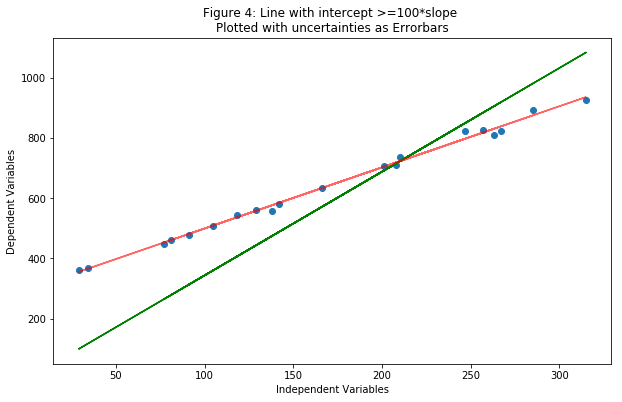

In [14]:
pl.figure(figsize=(10,6))
pl.plot(x1,y1,'o')
pl.plot(x1,smfit3.fittedvalues,'-',color='green')
pl.plot(x1,smfit4.fittedvalues,'-', color='red', alpha=0.6)
pl.xlabel('Independent Variables')
pl.ylabel('Dependent Variables')
pl.title('Figure 4: Line with intercept >=100*slope \nPlotted with uncertainties as Errorbars')

### Caption: 
Figure 4: for the line with higher intercept, we can see that the two fitted models generate very different fitted lines. 

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [15]:
smfit_w = smf.WLS(y1, x1, weight=1/errors(y1)).fit()
smfit_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            WLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     447.5
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.15e-14
Time:                        23:41:36   Log-Likelihood:                -126.21
No. Observations:                  20   AIC:                             254.4
Df Residuals:                      19   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.4383      0.163     21.154      0.000         3.098     3.779
==============================================================================
Omnibus:                        1.620   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.941
Skew:                          -0.062   Prob(JB):                        0.625
Kurtosis:                       1.944   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
smfit_w1 = smf.WLS(y1, x1).fit()
smfit_w1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            WLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     447.5
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.15e-14
Time:                        23:41:38   Log-Likelihood:                -126.21
No. Observations:                  20   AIC:                             254.4
Df Residuals:                      19   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.4383      0.163     21.154      0.000         3.098     3.779
==============================================================================
Omnibus:                        1.620   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.941
Skew:                          -0.062   Prob(JB):                        0.625
Kurtosis:                       1.944   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

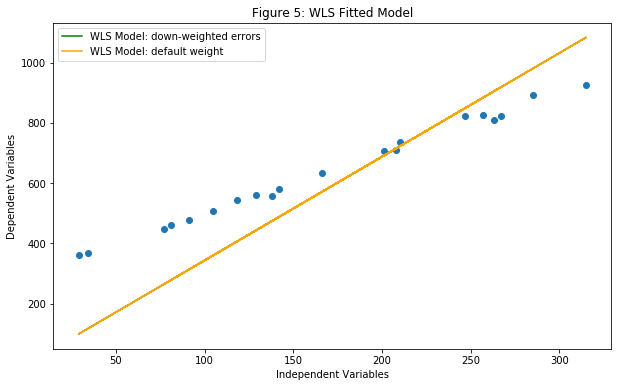

In [17]:
pl.figure(figsize=(10,6))
pl.plot(x1,y1,'o')
pl.plot(x1,smfit_w.predict(x1),'-',color='green', label='WLS Model: down-weighted errors')
pl.plot(x1,smfit_w1.predict(x1),'-',color='orange', label='WLS Model: default weight')
pl.xlabel('Independent Variables')
pl.ylabel('Dependent Variables')
pl.title('Figure 5: WLS Fitted Model')
pl.legend()

### Caption:
From Figure 5, we can see that the two models fit are pretty much identical but it does not seem to be good fit. 

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

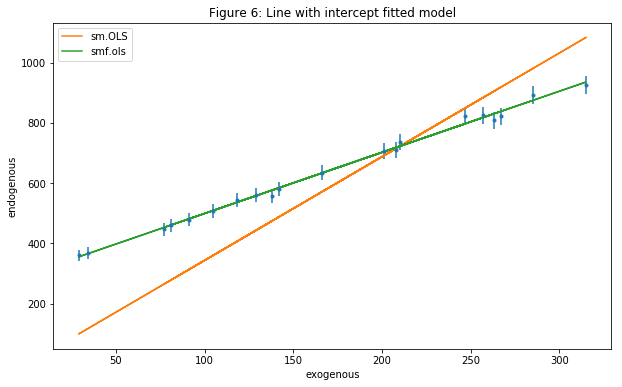

In [18]:
smfmodel = smf.ols('y ~ x + const', data={'x':x1, 'y':y1, 'const':np.ones(len(x1))}).fit()
pl.figure(figsize(10,6))
pl.errorbar(x1, y1, yerr=errors(y1), fmt='.')
pl.plot(x1, smfit3.fittedvalues, '-', label="sm.OLS")
pl.plot(x1, smfit4.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.title('Figure 6: Line with intercept fitted model')
pl.legend();

### Caption:
Figure 6 demonstrates the OLS models from line with large intercept using other statsmodel function. 

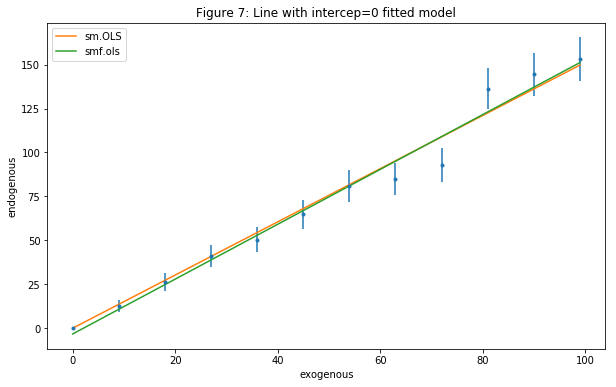

In [19]:
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.figure(figsize(10,6))
pl.errorbar(x, y, yerr=errors(y), fmt='.')
pl.plot(x, smfit1.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfit2.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.title('Figure 7: Line with intercep=0 fitted model')
pl.legend();

### Caption:
Figure 7 demonstrates the OLS models from line with intercept=0 using other statsmodel function.